# Experimento 10: _grid search_ e validação com SVM usando FS13 e FS20

# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [2]:
# Atributos FS13
FS13 = ['kurtosis-A3', 'meanAD-A3',
        'medianAD-A3', 'medianAD-D3',
        'energy-A3', 'energy-D3']

def col_in_fs13(string:str) -> bool:
    for feature in FS13:
        if feature in string:
            return True
    return False


chb_df = pd.read_csv('./chb.csv')

fs13_columns = np.array([col for col in chb_df.columns if col_in_fs13(col)])

groups = chb_df.pop('chb')
y = chb_df.pop('target').values
X = chb_df[fs13_columns].values

In [3]:
results = GridSearchCV(
    estimator=make_pipeline(StandardScaler(), SVC()),
    param_grid={'svc__C':[0.1, 1, 10, 100, 1000, 10_000],
                'svc__gamma':np.arange(0.5, 1.5, 0.1)},
    cv=GroupKFold(n_splits=24),
    ).fit(
        X=X,
        y=y,
        groups=groups
        )

results_df = pd.DataFrame(results.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,mean_test_score,std_test_score,rank_test_score
0,6.423384,0.404160,0.192160,0.112421,0.1,0.5,"{'svc__C': 0.1, 'svc__gamma': 0.5}",0.611345,0.583516,0.75500,...,0.357143,0.888889,0.515625,0.589286,0.551282,0.617647,0.602941,0.664857,0.152668,1
1,6.391148,0.396033,0.187695,0.105362,0.1,0.6,"{'svc__C': 0.1, 'svc__gamma': 0.6}",0.632353,0.593407,0.77375,...,0.370536,0.893939,0.531250,0.589286,0.544872,0.595588,0.588235,0.661574,0.151233,2
2,6.422879,0.352008,0.189847,0.105504,0.1,0.7,"{'svc__C': 0.1, 'svc__gamma': 0.7}",0.651261,0.597802,0.78625,...,0.379464,0.898990,0.510417,0.613095,0.544872,0.610294,0.588235,0.659122,0.150746,3
3,6.441842,0.374090,0.189626,0.106753,0.1,0.8,"{'svc__C': 0.1, 'svc__gamma': 0.7999999999999999}",0.651261,0.598901,0.79125,...,0.383929,0.893939,0.526042,0.619048,0.544872,0.617647,0.573529,0.655485,0.149030,4
4,6.710636,0.331817,0.193940,0.110794,0.1,0.9,"{'svc__C': 0.1, 'svc__gamma': 0.8999999999999999}",0.658613,0.608791,0.79625,...,0.383929,0.888889,0.536458,0.660714,0.551282,0.610294,0.558824,0.654838,0.148147,5
5,6.786395,0.387945,0.194248,0.108576,0.1,1,"{'svc__C': 0.1, 'svc__gamma': 0.9999999999999999}",0.662815,0.615385,0.79250,...,0.401786,0.868687,0.531250,0.642857,0.551282,0.610294,0.558824,0.651489,0.145408,6
6,6.927396,0.397745,0.196297,0.110096,0.1,1.1,"{'svc__C': 0.1, 'svc__gamma': 1.0999999999999999}",0.674370,0.621978,0.79000,...,0.406250,0.848485,0.546875,0.648810,0.544872,0.595588,0.573529,0.647826,0.141586,7
7,6.989576,0.340335,0.214059,0.150308,0.1,1.2,"{'svc__C': 0.1, 'svc__gamma': 1.1999999999999997}",0.676471,0.628571,0.78500,...,0.424107,0.838384,0.541667,0.636905,0.544872,0.602941,0.573529,0.645728,0.137867,8
8,7.077722,0.445709,0.200047,0.115823,0.1,1.3,"{'svc__C': 0.1, 'svc__gamma': 1.2999999999999998}",0.678571,0.637363,0.78000,...,0.433036,0.833333,0.541667,0.636905,0.544872,0.602941,0.573529,0.644218,0.135682,9
9,7.144427,0.442035,0.200638,0.113521,0.1,1.4,"{'svc__C': 0.1, 'svc__gamma': 1.4}",0.675420,0.646154,0.77875,...,0.446429,0.808081,0.546875,0.648810,0.557692,0.632353,0.573529,0.643147,0.132519,10


param_svc__C,param_svc__gamma,mean_test_score,std_test_score,rank_test_score
0.100000,0.500000,0.664857,0.152668,1
0.100000,0.600000,0.661574,0.151233,2
0.100000,0.700000,0.659122,0.150746,3
0.100000,0.800000,0.655485,0.149030,4
0.100000,0.900000,0.654838,0.148147,5
0.100000,1.000000,0.651489,0.145408,6
0.100000,1.100000,0.647826,0.141586,7
0.100000,1.200000,0.645728,0.137867,8
0.100000,1.300000,0.644218,0.135682,9
0.100000,1.400000,0.643147,0.132519,10


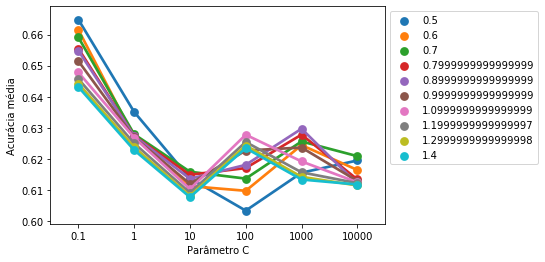

In [4]:
sns.pointplot(
    data=results_df,
    x='param_svc__C',
    y='mean_test_score',
    hue='param_svc__gamma',
    ).set(
        xlabel='Parâmetro C',
        ylabel='Acurácia média')

plt.legend(bbox_to_anchor=(1, 1))

results_df[[
    'param_svc__C',
    'param_svc__gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])

            fs20       6_ch       fs13
count  24.000000  24.000000  24.000000
mean    0.522252   0.789761   0.664857
std     0.044117   0.180005   0.155951
min     0.447674   0.404412   0.329457
25%     0.497768   0.789683   0.578977
50%     0.517276   0.852780   0.666928
75%     0.545861   0.898153   0.766039
max     0.622449   0.979798   0.905455


fs20,6_ch,fs13
0.481092,0.578782,0.611345
0.604396,0.800000,0.583516
0.567500,0.823750,0.755000
0.523636,0.936364,0.905455
0.447674,0.536822,0.329457
0.477459,0.864754,0.729508
0.518349,0.970183,0.738532
0.516204,0.861111,0.696759
0.538647,0.963768,0.775362
0.622449,0.951531,0.903061


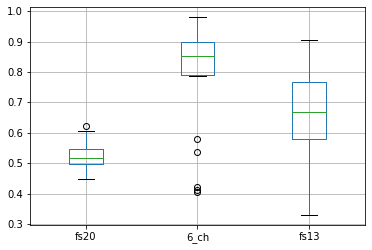

In [8]:
acc_list = []

best_C = results.best_params_['svc__C']
best_gamma = results.best_params_['svc__gamma']

pipe = make_pipeline(StandardScaler(),
                     SVC(C=best_C, gamma=best_gamma, cache_size=500))

for train_index, test_index in GroupKFold(n_splits=24).split(X, y, groups):
    # Separando dados
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test = X[train_index], X[test_index]

    acc_list.append(
        pipe.fit(X_train, y_train).score(X_test, y_test)
    )


svm_df = pd.read_csv('./04-fs20-svm.csv', index_col=0)
svm_df['fs13'] = acc_list

svm_df.boxplot()

print(svm_df.describe())

svm_df.style.hide_index().background_gradient(cmap='Blues')